In [2]:
import os 

# Set the working directory to the root of the project
# os.chdir(r'C:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam') # Desktop
# os.chdir(r"C:\Users\Jesper\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam") # Laptop
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam


In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

High-dimensional dataset  
n = 5000  
p = 1000  
4 classes (first column)   
Contains missing values, labeled -1000

In [4]:
# import dataset
df_raw_dataset = pd.read_csv(os.path.join('data', 'data_raw.txt'), sep='\t')

num_samples, num_features = df_raw_dataset.shape
df_raw_dataset.columns = ['class'] + [f'feature {i}' for i in range(1, num_features)]
num_classes = len(df_raw_dataset['class'].unique())

print(f'Number of samples: {num_samples}')
print(f'Number of features: {num_features}')
print(f'Number of classes: {num_classes}')
 
print("\nFirst 5 rows of the raw dataset:")
df_raw_dataset.head()

Number of samples: 5000
Number of features: 1001
Number of classes: 4

First 5 rows of the raw dataset:


,class,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 991,feature 992,feature 993,feature 994,feature 995,feature 996,feature 997,feature 998,feature 999,feature 1000
1,2,-1000.000000,0.493852,-0.097408,1.067132,-0.067073,-1000.000000,-0.279775,-0.615191,0.607782,...,0.324266,-1.176896,0.881978,0.954489,1.096337,0.443422,0.472010,-1.004938,1.813586,0.355279
2,1,0.146618,-0.843381,0.084083,-1.319645,-0.796130,-0.746654,2.162536,0.661785,-2.026639,...,-1.224754,-0.052719,-1.933023,0.756493,-0.801447,0.535718,0.927770,0.031396,1.388040,0.243790
3,2,-1.986901,-0.099954,0.974906,0.588525,-0.468599,-1.741473,1.122659,-0.498773,0.821948,...,0.175280,1.733996,0.504883,0.030797,-1.067338,-0.407298,0.470651,1.710230,1.549639,3.009124
4,4,0.789259,2.447201,1.200830,1.889460,0.654227,0.065656,-1000.000000,-0.792071,0.013415,...,1.511587,0.369627,0.507842,-0.107906,-1.024276,1.685745,-1000.000000,-0.173979,0.701901,-1.652574
5,4,-0.906112,0.377205,-1.073484,0.598118,-1.497231,-0.097904,-1.343775,-0.064006,-0.607471,...,-0.276598,0.946726,0.246329,-0.088163,0.480801,0.147565,0.724213,-1.113153,-1.081732,-1.033888


Generate dataset that drops missing values

In [5]:
df_raw_dataset = df_raw_dataset.replace(-1000, np.nan)

df_dropna = df_raw_dataset.dropna() # drop rows with NaN values
df_dropna.iloc[1:].to_csv(os.path.join('data', 'data_dropna.txt'), sep='\t') # save to file

num_samples_dropna, num_features_dropna = df_dropna.shape
print(f'Number of samples (dropna): {num_samples_dropna}')
print(f'Number of samples dropped: {num_samples - num_samples_dropna}')
print(f'Number of features (dropna): {num_features_dropna}') 

print("\nFirst 5 rows of the dataset without missing values:")
df_dropna.head()

Number of samples (dropna): 2020
Number of samples dropped: 2980
Number of features (dropna): 1001

First 5 rows of the dataset without missing values:


,class,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 991,feature 992,feature 993,feature 994,feature 995,feature 996,feature 997,feature 998,feature 999,feature 1000
2,1,0.146618,-0.843381,0.084083,-1.319645,-0.796130,-0.746654,2.162536,0.661785,-2.026639,...,-1.224754,-0.052719,-1.933023,0.756493,-0.801447,0.535718,0.927770,0.031396,1.388040,0.243790
3,2,-1.986901,-0.099954,0.974906,0.588525,-0.468599,-1.741473,1.122659,-0.498773,0.821948,...,0.175280,1.733996,0.504883,0.030797,-1.067338,-0.407298,0.470651,1.710230,1.549639,3.009124
7,1,-1.961148,-2.066390,1.157878,2.638431,0.380795,-1.135741,1.407938,0.641110,-0.257362,...,1.388097,0.940432,-3.248729,-1.056628,0.526422,-0.141712,-0.243878,2.261639,-0.178581,0.717398
9,3,-0.288366,1.755972,-1.144203,0.321466,1.399391,0.854409,-1.334523,-0.673844,-0.706075,...,-1.339229,-0.997101,-0.565771,2.662074,-0.520536,0.371094,-0.182359,-2.124540,-0.127067,-0.273763
10,3,2.504740,0.144209,2.255337,0.306778,1.239686,-0.452261,0.057692,1.508914,0.124645,...,1.096542,-0.198090,-0.855567,-0.923564,-0.994823,-1.253920,0.359540,-0.418368,0.423453,1.433150


## Investigate distributions

Class distribution, raw data:
1    0.2970
2    0.1992
3    0.2570
4    0.2468
Name: class, dtype: float64
Class distribution, without missing values:
1    0.257921
2    0.173267
3    0.446040
4    0.122772
Name: class, dtype: float64
Class distribution, raw data:
1    1485
2     996
3    1285
4    1234
Name: class, dtype: int64
Class distribution, without missing values:
1    521
2    350
3    901
4    248
Name: class, dtype: int64


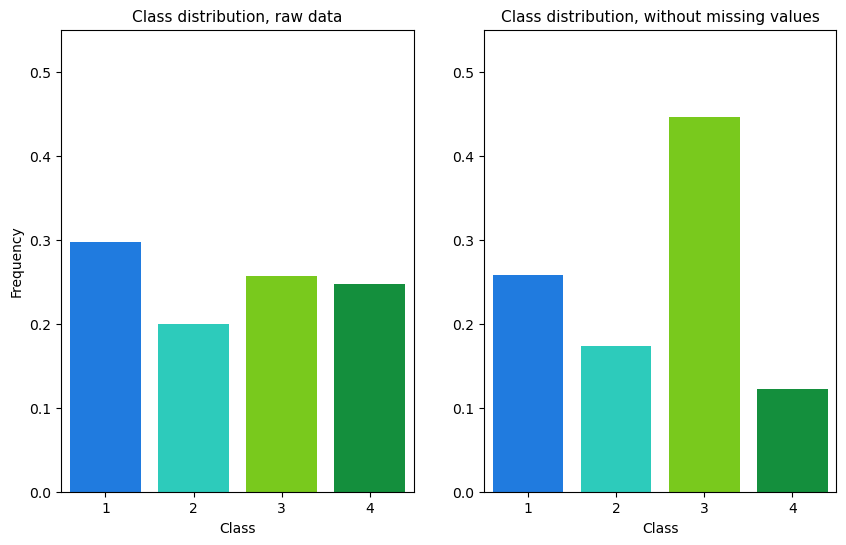

In [19]:
# Distribution of the classes
class_counts_raw = df_raw_dataset['class'].value_counts(normalize=True).sort_index()
class_counts_dropna = df_dropna['class'].value_counts(normalize=True).sort_index()
print(f'Class distribution, raw data:\n{class_counts_raw}')
print(f'Class distribution, without missing values:\n{class_counts_dropna}')
class_counts_raw_values = df_raw_dataset['class'].value_counts(normalize=False).sort_index()
class_counts_dropna_values = df_dropna['class'].value_counts(normalize=False).sort_index()
print(f'Class distribution, raw data:\n{class_counts_raw_values}')
print(f'Class distribution, without missing values:\n{class_counts_dropna_values}')

colors_classes = ["#0079FF", "#12E6D0", "#7BE600", "#00A336"]
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=class_counts_raw.index, y=class_counts_raw.values, palette=colors_classes)
plt.title('Class distribution, raw data', fontsize=11)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.ylim(0, 0.55)

plt.subplot(1, 2, 2)
sns.barplot(x=class_counts_dropna.index, y=class_counts_dropna.values, palette=colors_classes)
plt.title('Class distribution, without missing values', fontsize=11)
plt.xlabel('Class')
plt.ylabel('')
plt.ylim(0, 0.55)

path = "results/Q1/1a/class_distribution.png"
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()

**Note**: Removing missing values makes data (more) imbalanced

### Converting to a 3 class problem (1c)

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def transform_to_visualize(X, method='t-SNE'):
    if method == 't-SNE':
        tsne = TSNE(n_components=2, random_state=1234)
        X_transformed = tsne.fit_transform(X)
    elif method == 'PCA':
        pca = PCA(n_components=2, random_state=1234)
        X_transformed = pca.fit_transform(X)
    else:
        raise ValueError(f"Unknown method: {method}")
    return X_transformed

def visualize(X, y, colors_classes, method='t-SNE'):
    X_transformed = transform_to_visualize(X, method)
    
    plt.figure(figsize=(6, 6))
    plt.title(f'{method} visualization of the dataset', fontsize=12)
    sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y, palette=colors_classes)
    plt.xlabel(f'{method} component 1')
    plt.ylabel(f'{method} component 2')
    plt.show()

def visualize_classes(X, y, colors_classes):
    X_tsne = transform_to_visualize(X, 't-SNE')
    X_PCA = transform_to_visualize(X, 'PCA')

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.title('t-SNE visualization of the training set', fontsize=12)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette=colors_classes)
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')

    plt.subplot(1, 2, 2)
    plt.title('PCA visualization of the train set', fontsize=12)
    sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], hue=y, palette=colors_classes)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.show()

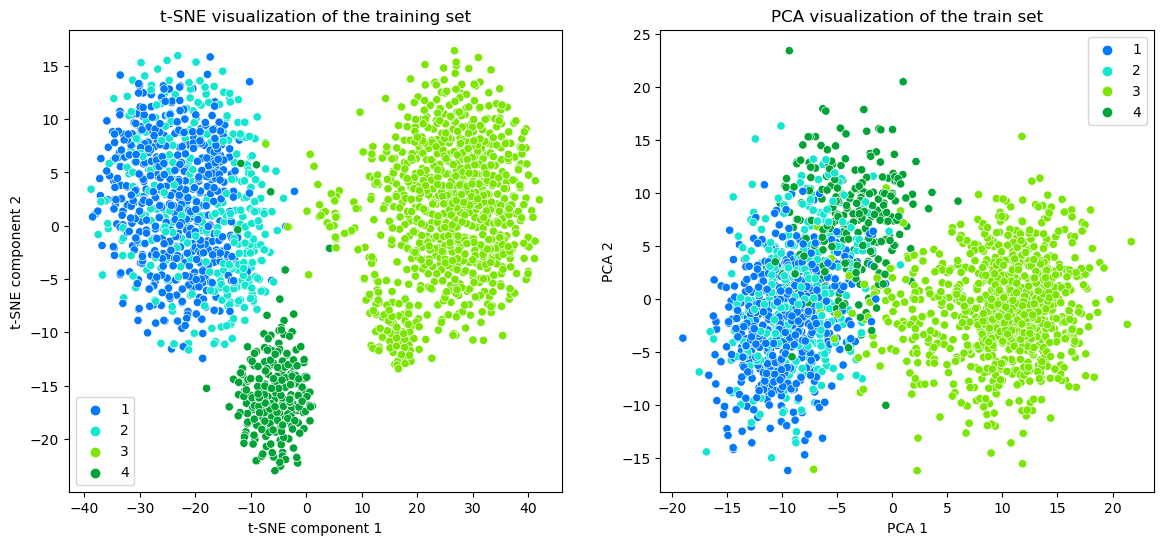

In [8]:
X = df_dropna.drop('class', axis=1).values
y = df_dropna['class'].values

visualize_classes(X, y, colors_classes)

**Notes:** Create a 3 class problem by creating a single class out of classes 1 and 2. Will create a very imbalanced dataset

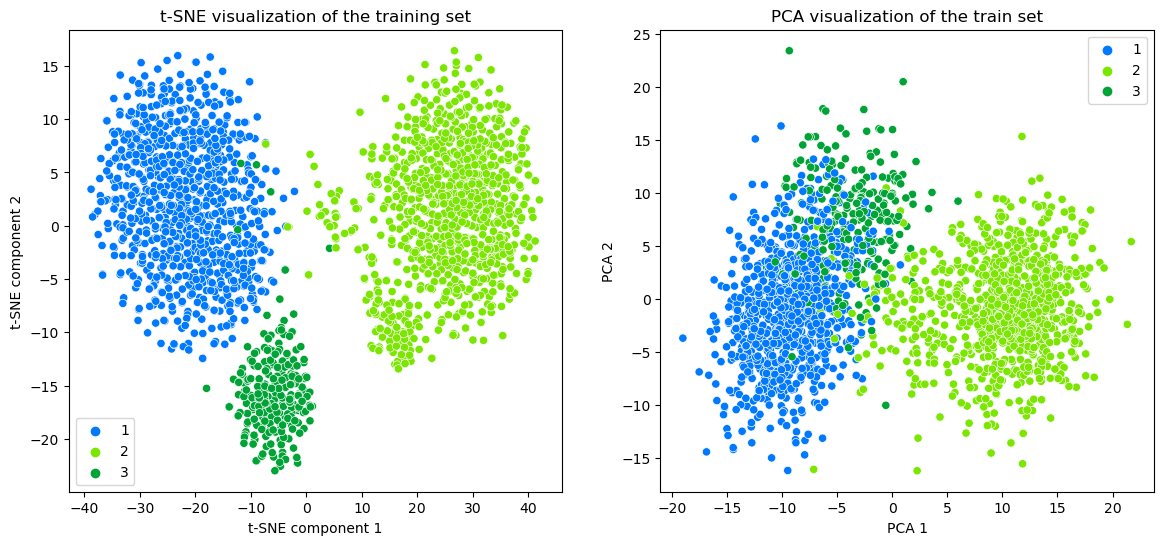

In [9]:
df_3_classes = df_dropna.copy()

df_3_classes['class'] = df_3_classes['class'].replace(2, 1)
df_3_classes['class'] = df_3_classes['class'].replace(3, 2)
df_3_classes['class'] = df_3_classes['class'].replace(4, 3)
# class 1 & 2 -> class 1
# class 3 -> class 2
# class 4 -> class 3

X_3_classes = df_3_classes.drop('class', axis=1).values
y_3_classes = df_3_classes['class'].values

# write to file
df_3_classes.to_csv(os.path.join('data', 'data_3_classes.txt'), sep='\t', index=False)

colors_3_classes = ["#0079FF", "#7BE600", "#00A336"]
visualize_classes(X_3_classes, y_3_classes, colors_3_classes)

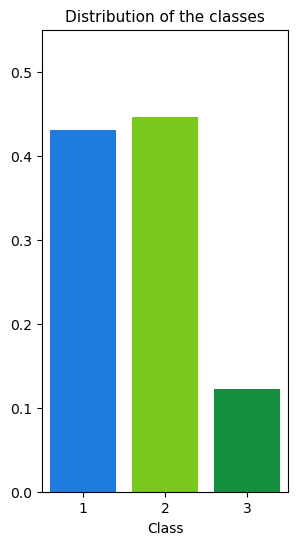

In [10]:
# Distribution of the classes
class_counts_3_classes = df_3_classes['class'].value_counts(normalize=True)

plt.figure(figsize=(7, 6))

plt.subplot(1, 2, 2)
sns.barplot(x=class_counts_3_classes.index, y=class_counts_3_classes.values, palette=colors_3_classes)
plt.title('Distribution of the classes', fontsize=11)
plt.xlabel('Class')
plt.ylabel('')
plt.ylim(0, 0.55)

plt.show()

### Converting to a 5 class problem (1c)

Number of rows to separate: 450


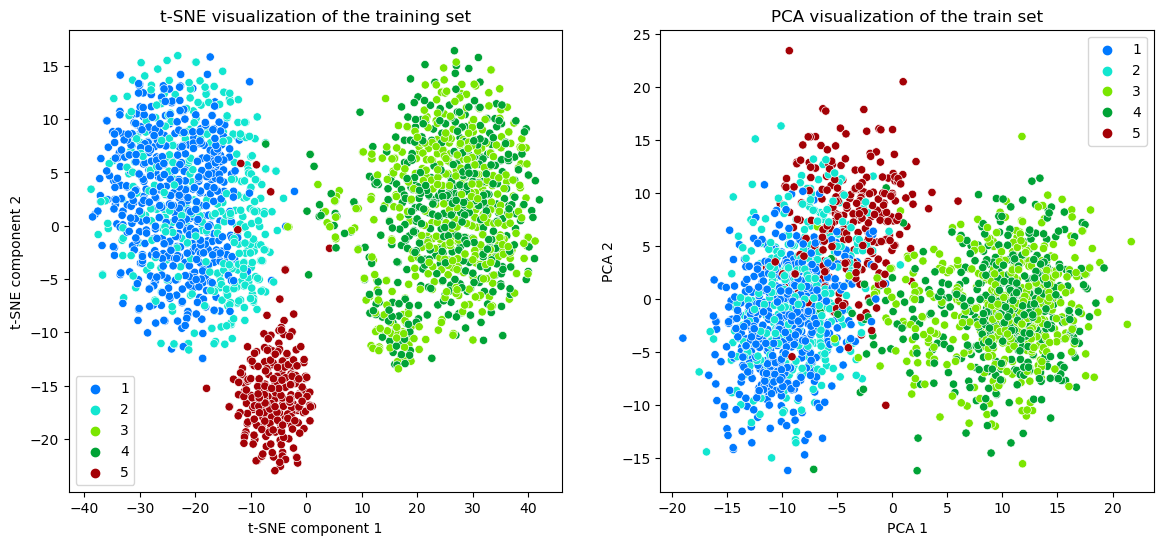

In [11]:
df_5_classes = df_dropna.copy()

# select 50% of class 3 to be separated, switch class 4 to be class 5
rows_to_sep = df_5_classes[df_5_classes['class'] == 3].sample(frac=0.5, random_state=1234).index
print(f'Number of rows to separate: {len(rows_to_sep)}')

df_5_classes['class'] = df_5_classes['class'].replace(4, 5) # class 4 -> class 5
df_5_classes.loc[rows_to_sep, 'class'] = 4 # separate 50% of class 3

X_5_classes = df_5_classes.drop('class', axis=1).values
y_5_classes = df_5_classes['class'].values

# write to file
df_5_classes.to_csv(os.path.join('data', 'data_5_classes.txt'), sep='\t', index=False)

colors_5_classes = ["#0079FF", "#12E6D0", "#7BE600", "#00A336", "#A40106"]
visualize_classes(X_5_classes, y_5_classes, colors_5_classes)

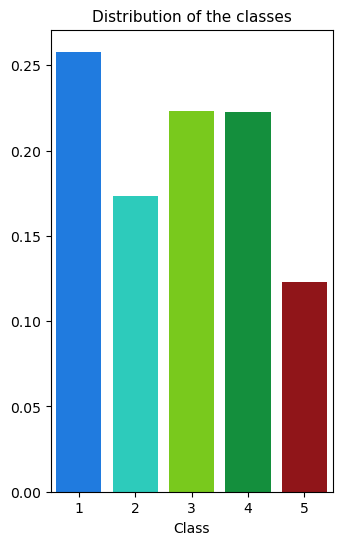

In [12]:
# Distribution of the classes
class_counts_5_classes = df_5_classes['class'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 2)
sns.barplot(x=class_counts_5_classes.index, y=class_counts_5_classes.values, palette=colors_5_classes)
plt.title('Distribution of the classes', fontsize=11)
plt.xlabel('Class')
plt.ylabel('')

plt.show()

## 1d)

In [13]:
X = df_dropna.drop('class', axis=1).values
y = df_dropna['class'].values

In [14]:
def get_share_features_with_corr(feature_corr, thresholds=[0.5, 0.4, 0.3, 0.2, 0.1], print_results=False):
    num_significant_features = []
    num_total_features = len(feature_corr)
    for threshold in thresholds:
        share_features_with_corr = len(feature_corr[abs(feature_corr) > threshold])/num_total_features
        if print_results:
            print(f"Share of features with correlation > {threshold}: {share_features_with_corr:.3f} ({share_features_with_corr*num_total_features:.0f})")
        num_significant_features.append(share_features_with_corr)
    
    return num_significant_features

all-vs-all comparison: keep all classes separated

Number of rows to drop: 0 of 2020
Number of rows to drop: 404 of 2020
Number of rows to drop: 1010 of 2020
Number of rows to drop: 1616 of 2020
Number of rows to drop: 1818 of 2020


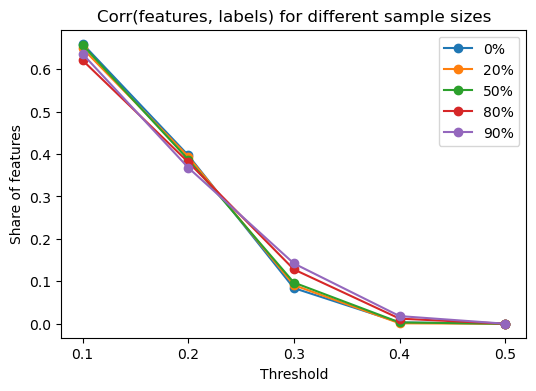

In [15]:
drop_shares = [0.0, 0.2, 0.5, 0.8, 0.9]
plt.figure(figsize=(6, 4)) 

for i, drop_share in enumerate(drop_shares):
    rows_to_drop = df_dropna.sample(frac=drop_share, random_state=1234).index
    df_dropped = df_dropna.drop(rows_to_drop)
    print(f'Number of rows to drop: {len(rows_to_drop)} of {num_samples_dropna}')
    
    feature_corr = df_dropped.corr(method='pearson').iloc[1:, 0]

    thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]
    num_significant_features = get_share_features_with_corr(feature_corr, thresholds)
    
    plt.plot(thresholds, num_significant_features, label=f'{drop_share*100:.0f}%', marker='o')
    plt.title('Corr(features, labels) for different sample sizes', fontsize=12)
    plt.xlabel('Threshold')
    plt.ylabel('Share of features')
    plt.xticks(thresholds)
    plt.legend()

path = "results/Q1/1d/corr_features_labels.png"
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

One vs. rest:

Drop share: 0.0
Number of rows to drop: 0 of 2020
3    0.446040
1    0.257921
2    0.173267
4    0.122772
Name: class, dtype: float64

Drop share: 0.2
Number of rows to drop: 404 of 2020
3    0.452351
1    0.258663
2    0.168936
4    0.120050
Name: class, dtype: float64

Drop share: 0.4
Number of rows to drop: 808 of 2020
3    0.452970
1    0.264851
2    0.164191
4    0.117987
Name: class, dtype: float64

Drop share: 0.6
Number of rows to drop: 1212 of 2020
3    0.456683
1    0.262376
2    0.160891
4    0.120050
Name: class, dtype: float64

Drop share: 0.8
Number of rows to drop: 1616 of 2020
3    0.487624
1    0.235149
2    0.175743
4    0.101485
Name: class, dtype: float64

Drop share: 0.9
Number of rows to drop: 1818 of 2020
3    0.504950
1    0.212871
2    0.193069
4    0.089109
Name: class, dtype: float64


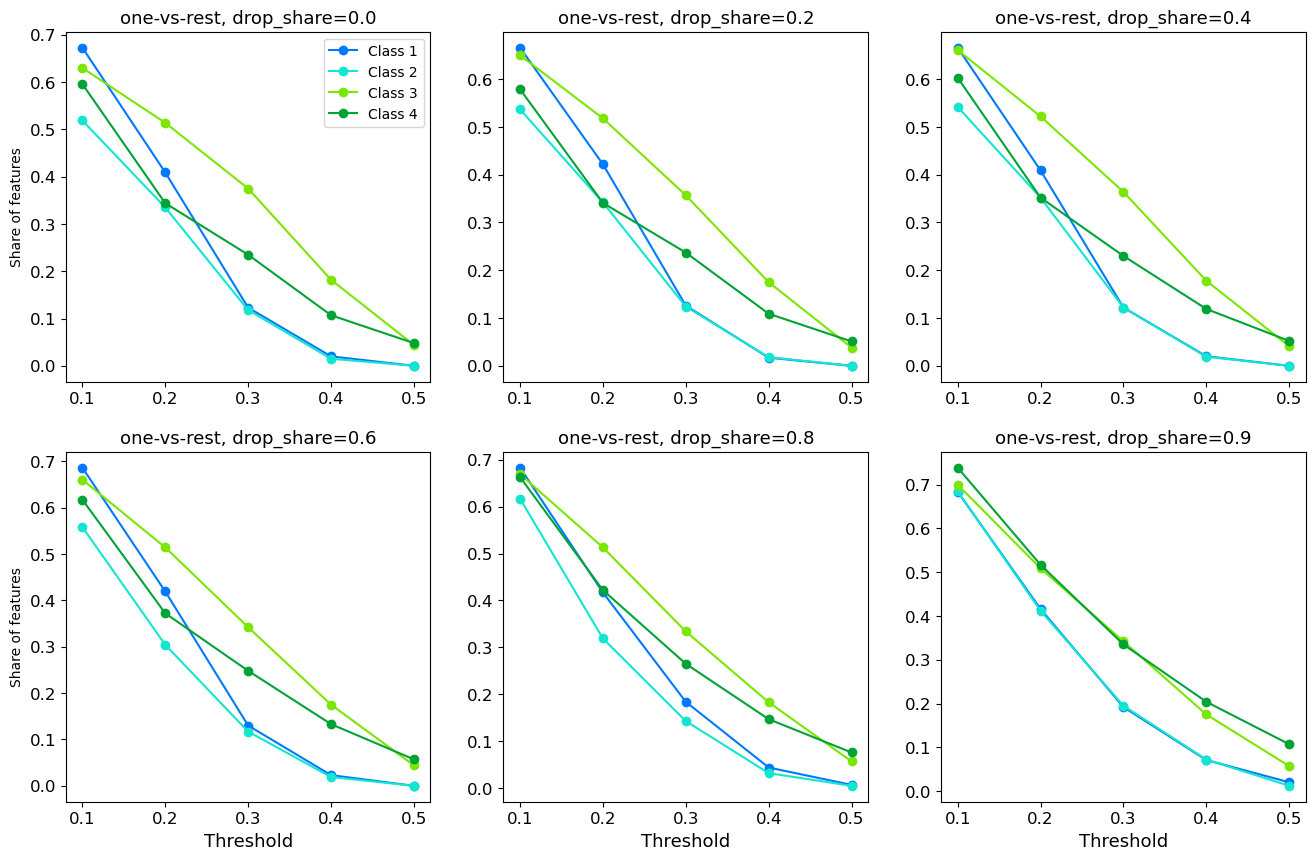

In [16]:
num_classes = len(df_dropna['class'].unique())

plt.figure(figsize=(16, 10))

drop_shares = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
print("One vs. rest:")
for i, drop_share in enumerate(drop_shares):
    rows_to_drop = df_dropna.sample(frac=drop_share, random_state=1234).index
    print(f"\nDrop share: {drop_share:.1f}")
    print(f'Number of rows to drop: {len(rows_to_drop)} of {num_samples_dropna}')
    df_dropped = df_dropna.drop(rows_to_drop)
    print(df_dropped['class'].value_counts(normalize=True))
    
    num_significant_features = []
    for class_label in range(1, num_classes+1):
        df_class = df_dropped.copy()      
        df_class[df_class['class'] != class_label] = 0 # set all other classes to 0
        
        corr_class = df_class.corr(method='pearson')
        feature_corr_class = corr_class.iloc[1:, 0]
        num_significant_features.append(get_share_features_with_corr(feature_corr_class, thresholds))
    
    plt.subplot(2, 3, i+1)
    plt.title(f'one-vs-rest, drop_share={drop_share}', fontsize=13)
    for class_label in range(1, num_classes+1):
        plt.plot(thresholds, num_significant_features[class_label-1], marker='o', 
                 label=f'Class {class_label}', color=colors_classes[class_label-1])
    plt.xlabel('Threshold', fontsize=13) if i > 2 else None
    plt.ylabel('Share of features') if i % 3 == 0 else None
    plt.xticks(thresholds, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend() if i == 0 else None

path = "results/Q1/1d/corr_features_labels_one_vs_rest.png"
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

One-vs-One: look at which features correlate with separating classes 1 and 2 *and* 3 and 4

Number of rows to drop: 0 of 871
Number of rows to drop: 174 of 871
Number of rows to drop: 436 of 871
Number of rows to drop: 697 of 871
Number of rows to drop: 784 of 871


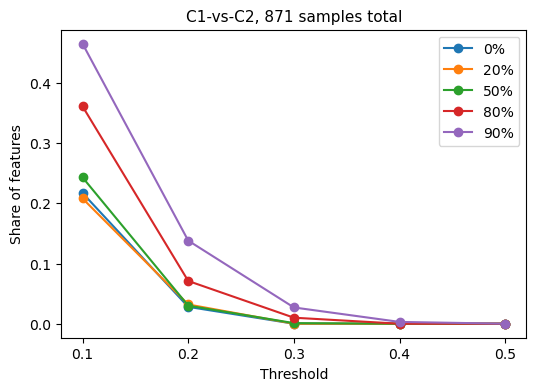

In [17]:
# classes 1 and 2
drop_shares = [0.0, 0.2, 0.5, 0.8, 0.9]
plt.figure(figsize=(6, 4)) 

for i, drop_share in enumerate(drop_shares):
    df_2_classes = df_dropna.copy()
    # drop samples with class 3 and 4
    df_2_classes = df_2_classes[df_2_classes['class'] < 3]
    rows_to_drop = df_2_classes.sample(frac=drop_share, random_state=1234).index
    df_dropped = df_2_classes.drop(rows_to_drop)
    print(f'Number of rows to drop: {len(rows_to_drop)} of {len(df_2_classes)}')
    
    feature_corr = df_dropped.corr(method='pearson').iloc[1:, 0]

    thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]
    num_significant_features = get_share_features_with_corr(feature_corr, thresholds)
    
    plt.plot(thresholds, num_significant_features, label=f'{drop_share*100:.0f}%', marker='o')
    plt.title(f'C1-vs-C2, {len(df_2_classes)} samples total', fontsize=11)
    plt.xlabel('Threshold')
    plt.ylabel('Share of features')
    plt.xticks(thresholds)
    plt.legend()

path = "results/Q1/1d/corr_features_labels_2_classes_C1C2.png" 
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

Number of rows to drop: 0 of 1149
Number of rows to drop: 230 of 1149
Number of rows to drop: 574 of 1149
Number of rows to drop: 919 of 1149
Number of rows to drop: 1034 of 1149


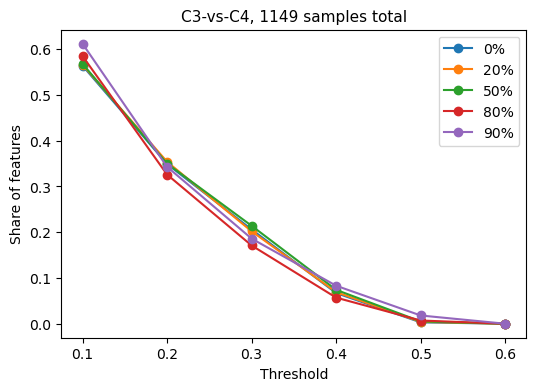

In [18]:
# classes 1 and 2
drop_shares = [0.0, 0.2, 0.5, 0.8, 0.9]
plt.figure(figsize=(6, 4)) 

for i, drop_share in enumerate(drop_shares):
    df_2_classes = df_dropna.copy()
    # drop samples with class 3 and 4
    df_2_classes = df_2_classes[df_2_classes['class'] > 2]
    rows_to_drop = df_2_classes.sample(frac=drop_share, random_state=1234).index
    df_dropped = df_2_classes.drop(rows_to_drop)
    print(f'Number of rows to drop: {len(rows_to_drop)} of {len(df_2_classes)}')
    
    feature_corr = df_dropped.corr(method='pearson').iloc[1:, 0]

    thresholds = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
    num_significant_features = get_share_features_with_corr(feature_corr, thresholds)
    
    plt.plot(thresholds, num_significant_features, label=f'{drop_share*100:.0f}%', marker='o')
    plt.title(f'C3-vs-C4, {len(df_2_classes)} samples total', fontsize=11)
    plt.xlabel('Threshold')
    plt.ylabel('Share of features')
    plt.xticks(thresholds)
    plt.legend()

path = "results/Q1/1d/corr_features_labels_2_classes_C3C4.png"
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()